In [0]:
spark

SparkSession - hive 
 
 
 SparkContext 

 Spark UI 

 
 Version 
 v3.2.1 
 Master 
 local[8] 
 AppName 
 Databricks Shell

In [0]:
import pyspark.sql.functions as F
import pyspark.sql.types as typ

In [0]:
comm_use_subset_path = "/databricks-datasets/COVID/CORD-19/2020-03-13/comm_use_subset/comm_use_subset/"
noncomm_use_subset_path = "/databricks-datasets/COVID/CORD-19/2020-03-13/noncomm_use_subset/noncomm_use_subset/"
biorxiv_medrxiv_path = "/databricks-datasets/COVID/CORD-19/2020-03-13/biorxiv_medrxiv/biorxiv_medrxiv/"

json_schema_path = "/databricks-datasets/COVID/CORD-19/2020-03-13/json_schema.txt"

comm_use_subset_pq_path = "/FileStore/tables/COVID/comm_use_subset.parquet"
noncomm_use_subset_pq_path = "/FileStore/tables/COVID/noncomm_use_subset.parquet"
biorxiv_medrxiv_pq_path = "/FileStore/tables/COVID/biorxiv_medrxiv.parquet"


#### 1 - Read the dataset using spark
1. reading common and non-common, and biorxiv
2. re-partitioning the data to be 8 partitions and Saving dataset as parquet then read data from it to optimize performance

In [0]:
comm_use_subset = spark.read.option("multiLine", True).json(comm_use_subset_path)

noncomm_use_subset = spark.read.option("multiLine", True).json(noncomm_use_subset_path)

biorxiv_medrxiv = spark.read.option("multiLine", True).json(biorxiv_medrxiv_path)

In [0]:
comm_use_subset.rdd.getNumPartitions()

Out[3]: 286

In [0]:
noncomm_use_subset.rdd.getNumPartitions()

Out[4]: 63

In [0]:
biorxiv_medrxiv.rdd.getNumPartitions()

Out[5]: 26

In [0]:
comm_use_subset.repartition(8).write.format("parquet").mode("overwrite").save(comm_use_subset_pq_path)

noncomm_use_subset.repartition(8).write.format("parquet").mode("overwrite").save(noncomm_use_subset_pq_path)

biorxiv_medrxiv.repartition(8).write.format("parquet").mode("overwrite").save(biorxiv_medrxiv_pq_path)

In [0]:
comm_use_subset = spark.read.format("parquet").load(comm_use_subset_pq_path)

noncomm_use_subset = spark.read.format("parquet").load(noncomm_use_subset_pq_path)

biorxiv_medrxiv = spark.read.format("parquet").load(biorxiv_medrxiv_pq_path)

In [0]:
total_comm_use_subset = comm_use_subset.count()

total_noncomm_use_subset = noncomm_use_subset.count()

total_biorxiv_medrxiv = biorxiv_medrxiv.count()

print ("total comm: %s, total noncomm: %s , total biorxiv: %s" % (total_comm_use_subset, total_noncomm_use_subset, total_biorxiv_medrxiv))

total comm: 8997, total noncomm: 1972 , total biorxiv: 803


I searched for a CSV metadata file but found it, not sure if this is a valid file

In [0]:
%fs ls /databricks-datasets/COVID/CORD-19/2020-03-13/

path,name,size,modificationTime
dbfs:/databricks-datasets/COVID/CORD-19/2020-03-13/COVID.DATA.LIC.AGMT.pdf,COVID.DATA.LIC.AGMT.pdf,26690,1585887288000
dbfs:/databricks-datasets/COVID/CORD-19/2020-03-13/all_sources_metadata_2020-03-13.csv,all_sources_metadata_2020-03-13.csv,49211745,1585887288000
dbfs:/databricks-datasets/COVID/CORD-19/2020-03-13/all_sources_metadata_2020-03-13.readme,all_sources_metadata_2020-03-13.readme,1000,1585887288000
dbfs:/databricks-datasets/COVID/CORD-19/2020-03-13/biorxiv_medrxiv/,biorxiv_medrxiv/,0,0
dbfs:/databricks-datasets/COVID/CORD-19/2020-03-13/comm_use_subset/,comm_use_subset/,0,0
dbfs:/databricks-datasets/COVID/CORD-19/2020-03-13/json_schema.txt,json_schema.txt,2906,1585887559000
dbfs:/databricks-datasets/COVID/CORD-19/2020-03-13/noncomm_use_subset/,noncomm_use_subset/,0,0
dbfs:/databricks-datasets/COVID/CORD-19/2020-03-13/pmc_custom_license/,pmc_custom_license/,0,0


In [0]:
meta_data_location = "/databricks-datasets/COVID/CORD-19/2020-03-13/all_sources_metadata_2020-03-13.csv"
metadata = spark.read.csv(meta_data_location,
                         header=True,
                         inferSchema=True)

#### 2 - exploratory data analysis
1. get number of records in a file.
2. display sample of data (5 records).
3. display number of distinct values for each columns.
4. display number of null values for each columns.
5. get distinct values for publish time and handel it.
6. visulize histgram for publish time column.
7. visulize histgram for has_full_text column.
8. display value counts for source x.

In [0]:
metadata.count()

Out[87]: 30057

In [0]:
metadata.printSchema()

root
 |-- sha: string (nullable = true)
 |-- source_x: string (nullable = true)
 |-- title: string (nullable = true)
 |-- doi: string (nullable = true)
 |-- pmcid: string (nullable = true)
 |-- pubmed_id: string (nullable = true)
 |-- license: string (nullable = true)
 |-- abstract: string (nullable = true)
 |-- publish_time: string (nullable = true)
 |-- authors: string (nullable = true)
 |-- journal: string (nullable = true)
 |-- Microsoft Academic Paper ID: string (nullable = true)
 |-- WHO #Covidence: string (nullable = true)
 |-- has_full_text: string (nullable = true)



In [0]:
metadata.toPandas().head()

,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,authors,journal,Microsoft Academic Paper ID,WHO #Covidence,has_full_text
0,c630ebcdf30652f0422c3ec12a00b50241dc9bd9,CZI,Angiotensin-converting enzyme 2 (ACE2) as a SA...,10.1007/s00134-020-05985-9,None,32125455,cc-by-nc,None,2020,"Zhang, Haibo; Penninger, Josef M.; Li, Yimin; ...",Intensive Care Med,2002765492,#3252,True
1,53eccda7977a31e3d0f565c884da036b1e85438e,CZI,Comparative genetic analysis of the novel coro...,10.1038/s41421-020-0147-1,None,None,cc-by,None,2020,"Cao, Yanan; Li, Lin; Feng, Zhimin; Wan, Shengq...",Cell Discovery,3003430844,#1861,True
2,210a892deb1c61577f6fba58505fd65356ce6636,CZI,Incubation Period and Other Epidemiological Ch...,10.3390/jcm9020538,None,None,cc-by,The geographic spread of 2019 novel coronaviru...,2020,"Linton, M. Natalie; Kobayashi, Tetsuro; Yang, ...",Journal of Clinical Medicine,3006065484,#1043,True
3,e3b40cc8e0e137c416b4a2273a4dca94ae8178cc,CZI,Characteristics of and Public Health Responses...,10.3390/jcm9020575,None,32093211,cc-by,"In December 2019, cases of unidentified pneumo...",2020,"Deng, Sheng-Qun; Peng, Hong-Juan",J Clin Med,177663115,#1999,True
4,92c2c9839304b4f2bc1276d41b1aa885d8b364fd,CZI,Imaging changes in severe COVID-19 pneumonia,10.1007/s00134-020-05976-w,None,32125453,cc-by-nc,None,2020,"Zhang, Wei",Intensive Care Med,3006643024,#3242,False


In [0]:
metadata.toPandas().describe()

,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,authors,journal,Microsoft Academic Paper ID,WHO #Covidence,has_full_text
count,17977,29907,29561,26337,27268,16842,17731,26625,18272,28180,17715,1710,1545,17181
unique,17869,348,25026,22183,22988,12718,208,22513,4702,23537,2018,1175,1488,250
top,"Virus in Rhesus Monkeys""",PMC,Articles of Significant Interest Selected from...,http://dx.doi.org/10.1371/journal.pcbi.1006483,NO-CC CODE,30408032,CC BY,The automated comparison of protein-ligand bin...,2020,"['Ehrt, Christiane', 'Brinkjost, Tobias', 'Koc...",PLoS One,True,"Warren E.']""",True
freq,5,27337,67,35,89,35,11526,35,1128,35,2171,188,15,12787


In [0]:
metadata.toPandas().isnull().sum()

Out[16]: sha                            12080
source_x                         150
title                            496
doi                             3720
pmcid                           2789
pubmed_id                      13215
license                        12326
abstract                        3432
publish_time                   11785
authors                         1877
journal                        12342
Microsoft Academic Paper ID    28347
WHO #Covidence                 28512
has_full_text                  12876
dtype: int64

In [0]:
metadata.select('publish_time').distinct().show(5)

+--------------------+
|        publish_time|
+--------------------+
|                2020|
|                2019|
|                null|
| the government s...|
| it seems that th...|
+--------------------+
only showing top 5 rows



In [0]:
metadata = metadata.withColumn('year', F.regexp_extract(F.col('publish_time'), r'((18|19|20)(\d{2}))', 1))

In [0]:
metadata.select('year').distinct().count()

Out[86]: 53

In [0]:
metadata = metadata.withColumn('has_full_text',\
                     F.when(F.col('has_full_text') != 'True', F.lit('False')) \
                     .otherwise(F.col('has_full_text')))

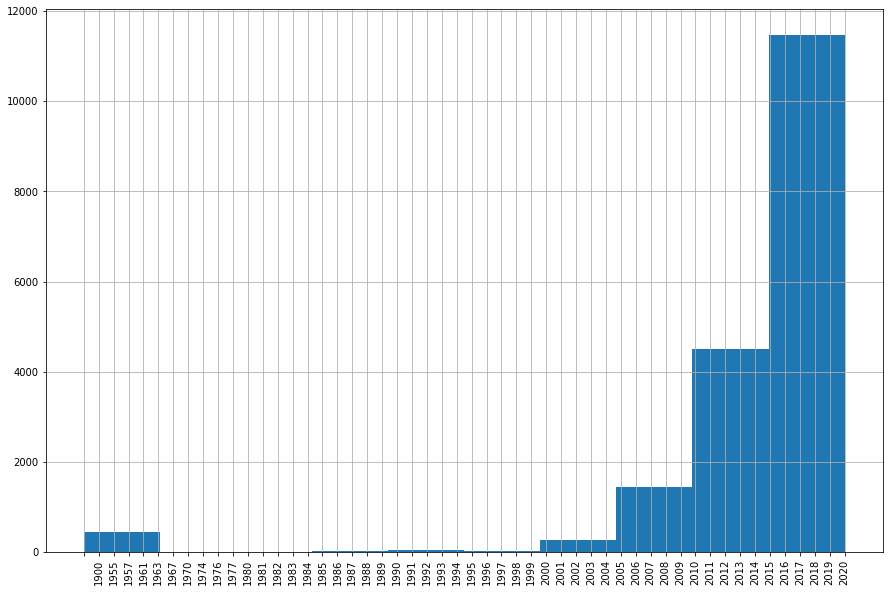

In [0]:
import matplotlib.pyplot as plt

metadata.orderBy('year').toPandas()['year'].hist(figsize = (15,10))
plt.xticks(rotation=90)
plt.show()

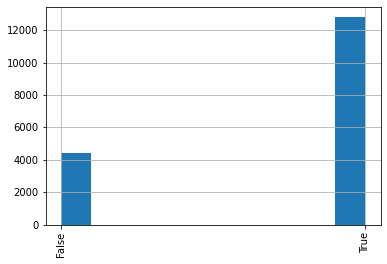

In [0]:
import matplotlib.pyplot as plt

metadata.orderBy('has_full_text').toPandas()['has_full_text'].hist()
plt.xticks(rotation=90)
plt.show()

In [0]:
# let's take a quick look around
num_entries = metadata.count()
print("There are {} many entries in this dataset:".format(num_entries))

with_full_text = metadata.where(F.col('has_full_text') == 'True').count()
print("-- {} have full text entries".format(with_full_text))

There are 30057 many entries in this dataset:
-- 12787 have full text entries


In [0]:
metadata.select('source_x').toPandas()['source_x'].value_counts()


Out[5]: PMC                                             27337
CZI                                              1236
biorxiv                                           566
medrxiv                                           361
http://dx.doi.org/10.1038/nature17180               5
                                                ...  
2020-01-28                                          1
http://dx.doi.org/10.1021/acsami.6b09263            1
http://dx.doi.org/10.1177/1040638717753963          1
http://dx.doi.org/10.1292/jvms.15-0414              1
http://dx.doi.org/10.1164/rccm.201402-0317ED        1
Name: source_x, Length: 348, dtype: int64

In [0]:
comm_use_subset.columns

Out[106]: ['abstract',
 'back_matter',
 'bib_entries',
 'body_text',
 'metadata',
 'paper_id',
 'ref_entries']

In [0]:
comm_use_subset.select(\
                         F.col('metadata'),F.col('abstract'),F.col('body_text')\
                         ).printSchema()

root
 |-- metadata: struct (nullable = true)
 |    |-- authors: array (nullable = true)
 |    |    |-- element: struct (containsNull = true)
 |    |    |    |-- affiliation: struct (nullable = true)
 |    |    |    |    |-- institution: string (nullable = true)
 |    |    |    |    |-- laboratory: string (nullable = true)
 |    |    |    |    |-- location: struct (nullable = true)
 |    |    |    |    |    |-- addrLine: string (nullable = true)
 |    |    |    |    |    |-- country: string (nullable = true)
 |    |    |    |    |    |-- postBox: string (nullable = true)
 |    |    |    |    |    |-- postCode: string (nullable = true)
 |    |    |    |    |    |-- region: string (nullable = true)
 |    |    |    |    |    |-- settlement: string (nullable = true)
 |    |    |    |-- email: string (nullable = true)
 |    |    |    |-- first: string (nullable = true)
 |    |    |    |-- last: string (nullable = true)
 |    |    |    |-- middle: array (nullable = true)
 |    |    |    |    

#### 3 - Preparation and Cleaning the data:
1. get authors from json metadata files by concat first and last name for author.
2. join abstract texts in one column.
3. join json metadata files with csv file.
4. drop Duplicates in title column.
5. drop nulls.
6. Keep Only the english documents using (langdetect).

In [0]:
def extract_and_handle_columns(subset):
    subset = subset.select(\
                       F.array_join(F.transform("metadata.authors",\
                                                         lambda author: F.concat(author.first, F.lit(' '), author.last)),",").alias('authors'),\
                       F.array_join(F.col('abstract.text')," ").alias('abstract'),
                       F.col('metadata.title')
                       )
    return subset

In [0]:
comm_use_subset = extract_and_handle_columns(comm_use_subset)
noncomm_use_subset = extract_and_handle_columns(noncomm_use_subset)
biorxiv_medrxiv = extract_and_handle_columns(biorxiv_medrxiv)

In [0]:
comm_use_subset.show(5)

+--------------------+--------------------+--------------------+
|             authors|            abstract|               title|
+--------------------+--------------------+--------------------+
|Liqun Yang,Pengfe...|Since cancer stem...|Targeting cancer ...|
|Si Sou,Dirk-Jan K...|                    |Abstracts from th...|
|          Po-Yuan Ke|Autophagy is an e...|Molecular Science...|
|W Takahashi,H Hat...|Introduction Auto...|Sepsis and the heart|
|Heung-Man Lee,Il-...|                    |A1 Pirfenidone in...|
+--------------------+--------------------+--------------------+
only showing top 5 rows



In [0]:
metadata = metadata.select('authors','abstract','title')\
                    .union(comm_use_subset)\
                    .union(noncomm_use_subset)\
                    .union(biorxiv_medrxiv)

In [0]:
metadata.toPandas().describe()

,authors,abstract,title
count,39952,38397,41333
unique,34543,30959,29484
top,,,
freq,565,1517,617


In [0]:
metadata = metadata.dropDuplicates(['title'])

In [0]:
metadata = metadata.na.drop()

In [0]:
metadata.toPandas().isnull().sum()

Out[103]: authors     0
abstract    0
title       0
dtype: int64

In [0]:
!pip install langdetect

     |████████████████████████████████| 981 kB 5.4 MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993221 sha256=438d9e92dcd5fbb2d66cfb4f2b5fd506c3e4a5f7e9f395b69bd3cf7d80850553
  Stored in directory: /root/.cache/pip/wheels/13/c7/b0/79f66658626032e78fc1a83103690ef6797d551cb22e56e734
Successfully built langdetect
You should consider upgrading via the '/databricks/python3/bin/python -m pip install --upgrade pip' command.


In [0]:
from langdetect import detect
@udf('string')
def detect_lang(title):
    lang = ''
    try:
        lang = detect(title)
    except:
        lang = ''
    return lang

In [0]:
metadata = metadata.withColumn('lang', detect_lang('title'))

In [0]:
metadata = metadata.where(F.col('lang') == 'en')

In [0]:
metadata.repartition(8).write.format("parquet").mode("overwrite").save("/delta_covid_papers_metadata/")

---------------------------------------------------------------------------
NameError                                 Traceback (most recent call last)
<command-4472122251533009> in <module>
----> 1 metadata.repartition(8).write.format("parquet").mode("overwrite").save("/delta_covid_papers_metadata/")

NameError: name 'metadata' is not defined

In [0]:
metadata = spark.read.format("parquet").load("/delta_covid_papers_metadata/")

#### 4 - Preprocessing::
1. Remove Punctuation.
2. convert text to lower case.
3. Remove stop words with custom stop words.
4. concat title with abstract to vectorize

In [0]:
punctuation_pattern = r"^[!@#$%^&*()_+\-=\[\]{};':\"\\|,.<>\/?]*$"

metadata = metadata.withColumn("title", F.regexp_replace("title", punctuation_pattern, ""))\
                   .withColumn("abstract", F.regexp_replace("abstract", punctuation_pattern, "")) 

In [0]:
metadata = metadata.withColumn("title", F.lower("title"))\
                   .withColumn("abstract", F.lower("abstract"))\
                   .withColumn("authors", F.lower("authors"))

In [0]:
from pyspark.ml.feature import StopWordsRemover

stopwordList = [ 'doi', 'preprint', 'copyright', 'peer', 'reviewed', 'org',
'https', 'et', 'al', 'author', 'figure','rights', 'reserved', 'permission', 'used', 'using',
'biorxiv', 'medrxiv', 'license', 'fig', 'fig.', 'al.', 'Elsevier', 'PMC', 'CZI', 'www']

stopwordList.extend(StopWordsRemover().getStopWords())

metadata = metadata.withColumn('title_list', F.split('title', ' '))\
                   .withColumn('abstract_list', F.split('abstract', ' '))

metadata = StopWordsRemover(inputCol = 'title_list', outputCol = 'title_filter' ,stopWords=stopwordList).transform(metadata)
metadata = StopWordsRemover(inputCol = 'abstract_list', outputCol = 'abstract_filter' ,stopWords=stopwordList).transform(metadata)

metadata = metadata.withColumn('title', F.col('title_filter'))\
                   .withColumn('abstract', F.col('abstract_filter'))\
                   .drop('title_list','abstract_list','abstract_filter','title_filter')


In [0]:
metadata.show(5)

+--------------------+--------------------+--------------------+----+
|             authors|            abstract|               title|lang|
+--------------------+--------------------+--------------------+----+
|['douam, florian'...|[yellow, fever, v...|[type, iii, inter...|  en|
|['kahn, rebecca',...|[vaccine, efficac...|[analyzing, vacci...|  en|
|['horvath, c m', ...|[previous, nucleo...|[eukaryotic, coup...|  en|
|['martin, baptist...|[mononegaviruses,...|[methyltransferas...|  en|
|['nuzzo, jennifer...|[background:, 201...|[makes, health, s...|  en|
+--------------------+--------------------+--------------------+----+
only showing top 5 rows



In [0]:
metadata = metadata.withColumn('document', F.concat(F.col('title'),F.col('abstract')))

In [0]:
metadata.show(5)

+--------------------+--------------------+--------------------+----+--------------------+
|             authors|            abstract|               title|lang|            document|
+--------------------+--------------------+--------------------+----+--------------------+
|['douam, florian'...|[yellow, fever, v...|[type, iii, inter...|  en|[type, iii, inter...|
|['kahn, rebecca',...|[vaccine, efficac...|[analyzing, vacci...|  en|[analyzing, vacci...|
|['horvath, c m', ...|[previous, nucleo...|[eukaryotic, coup...|  en|[eukaryotic, coup...|
|['martin, baptist...|[mononegaviruses,...|[methyltransferas...|  en|[methyltransferas...|
|['nuzzo, jennifer...|[background:, 201...|[makes, health, s...|  en|[makes, health, s...|
+--------------------+--------------------+--------------------+----+--------------------+
only showing top 5 rows



#### 5 - Vectorization:
i used Word2vec to vectorize document with vector size = 30 and maxIter = 100

In [0]:
from pyspark.ml.feature import Word2Vec

word2Vec = Word2Vec(vectorSize=50, minCount=0, maxIter=20, inputCol="document", outputCol="features")

word2Vec_model = word2Vec.fit(metadata)

word2Vec_result = word2Vec_model.transform(metadata)

#### 6 - Clustering:
1. choose the best k you decide from the elbow and Silhouette methods.
2. I used PCA to reduce the dimensions.
3. I tried these methods and chose the best ones (KMeans, BisectingKMeans, GaussianMixture, PowerIterationClustering) using ClusteringEvaluator.

In [0]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator

import numpy as np
import pandas as pd 
import pylab as pl

elbowCost = np.zeros(10)
silhouetteCost = np.zeros(10)
evaluator = ClusteringEvaluator(predictionCol='prediction', featuresCol='features', metricName='silhouette', distanceMeasure='squaredEuclidean')

for k in range(2,10):
    
    
    kmeans = KMeans().setK(k).setSeed(3).setFeaturesCol('features')
    model = kmeans.fit(word2Vec_result)
    
    
    preditions = model.transform(word2Vec_result)
    score = evaluator.evaluate(preditions)
    elbowCost[k] = model.summary.trainingCost
    silhouetteCost[k] = score

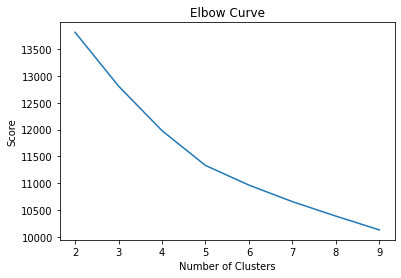

In [0]:
df_cost = pd.DataFrame(elbowCost[2:])
df_cost.columns = ["cost"]
new_col = [2,3,4,5,6,7,8,9]
df_cost.insert(0, 'cluster', new_col)


pl.plot(df_cost.cluster, df_cost.cost)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

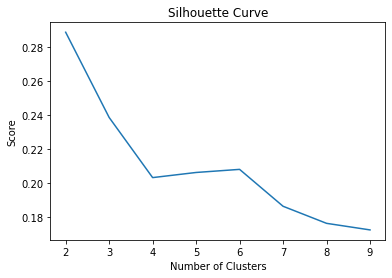

In [0]:
df_cost = pd.DataFrame(silhouetteCost[2:])
df_cost.columns = ["cost"]
new_col = [2,3,4,5,6,7,8,9]
df_cost.insert(0, 'cluster', new_col)


pl.plot(df_cost.cluster, df_cost.cost)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Silhouette Curve')
pl.show()

I prefer going ahead with K = 6 where a local maxima of Silhouette Score is observed, and for elbow k = 5 where a score sudden change

In [0]:
from pyspark.ml.feature import PCA 

pca = PCA(k = 10, inputCol="features", outputCol="pcaFeatures")
pca_model = pca.fit(word2Vec_result)
pca_result = pca_model.transform(word2Vec_result)

In [0]:
pca_model.explainedVariance

Out[16]: DenseVector([0.2323, 0.1047, 0.0804, 0.0531, 0.0466, 0.0347, 0.0326, 0.0271, 0.0251, 0.0242])

In [0]:
best_k = 6

In [0]:
evaluator = ClusteringEvaluator(predictionCol='prediction', featuresCol='features', metricName='silhouette', distanceMeasure='squaredEuclidean')

In [0]:
from pyspark.ml.clustering import KMeans

kmeans_model = KMeans().setK(best_k).setSeed(3).setFeaturesCol('pcaFeatures')
kmeans_model = kmeans.fit(pca_result)
kmeans_results = model.transform(pca_result)


In [0]:
from pyspark.ml.clustering import BisectingKMeans

bisectingKMeans = BisectingKMeans().setK(best_k).setSeed(3).setFeaturesCol('pcaFeatures')
bisectingKMeans_model = bisectingKMeans.fit(pca_result)
bisectingKMeans_results = model.transform(pca_result)

In [0]:
from pyspark.ml.clustering import GaussianMixture

gaussianMixture = GaussianMixture().setK(best_k).setSeed(3).setFeaturesCol("pcaFeatures")
gaussianMixture_model = gaussianMixture.fit(pca_result)
gaussianMixture_results = gaussianMixture_model.transform(pca_result)

In [0]:
from pyspark.ml.clustering import PowerIterationClustering

powerIterationClustering = GaussianMixture().setK(best_k).setSeed(3).setFeaturesCol("pcaFeatures")
powerIterationClustering_model = powerIterationClustering.fit(pca_result)
powerIterationClustering_results = powerIterationClustering_model.transform(pca_result)

In [0]:
algorithms_costs = [
    evaluator.evaluate(kmeans_results),
    evaluator.evaluate(bisectingKMeans_results),
    evaluator.evaluate(gaussianMixture_results),
    evaluator.evaluate(powerIterationClustering_results)
]
algorithms = ['kmeans','bisectingKMeans','gaussianMixture','powerIterationClustering']

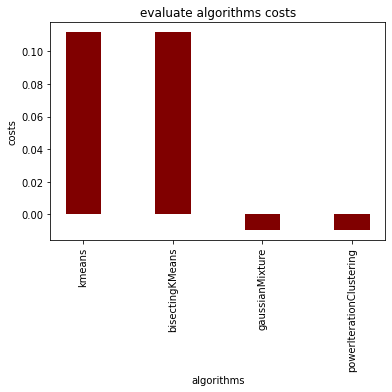

In [0]:
pl.bar(algorithms, algorithms_costs, color ='maroon', width = 0.4)
pl.xlabel('algorithms')
pl.ylabel('costs')
pl.title('evaluate algorithms costs')
pl.xticks(rotation=90)
pl.show()

#### 7 - Recommender system
1. Create a function with the signature recommendPaper(paper_title,N).
2. use cosine similarity to compare title with each point to the cluster title belongs.
3. return list of most similar titles in the cluster

In [0]:
from sklearn.metrics.pairwise import cosine_similarity

def recommendPaper(title, N):
    
    sample_df = spark.createDataFrame([title], "string").toDF("title")

    sample_df = sample_df.withColumn('title', F.split(F.lower("title"), ' '))

    sample_df_word2Vec = word2Vec_model.transform(sample_df)

    sample_df_pca = pca_model.transform(sample_df_word2Vec)

    sample_df_results = model.transform(sample_df_pca)

    predict_cluster = model.predict(sample_df_pca.head().pcaFeatures)

    predict_cluster_df = results.where(F.col('prediction') == predict_cluster)

    # Join DFs
    cross_join_df = predict_cluster_df.crossJoin(\
        sample_df_results.select(F.col("title").alias("title_item"), F.col("pcaFeatures").alias("pcaFeatures_item")))

    # Get cosine similarity
    cosine_similarity_df = cross_join_df.rdd.map(lambda row: (row['title'], row['title_item'],
                                               float(
                                                   cosine_similarity(
                                                       [row['pcaFeature']],
                                                       [row['pcaFeatures_item']]
                                                   )[0,0]
                                               )
                                              )
                                       ).toDF(schema=['title', 'title_item', 'cosine_similarity'])
    cosine_similarity_df = cosine_similarity_df.withColumn('title', F.array_join('title'," ")).orderBy(F.col('cosine_similarity').desc())
    return list(cosine_similarity_df.select('title').toPandas()['title'][:N])


In [0]:
title = "Type III Interferon-Mediated Signaling Is Critical for Controlling Live Attenuated Yellow Fever Virus Infection In Vivo"
recommendPaper(title, 10)        

Out[95]: ['type iii interferon-mediated signaling critical controlling live attenuated yellow fever virus infection vivo',
 'rna helicase signaling critical type interferon production protection rift valley fever virus mucosal challenge',
 'role type iii interferons hepatitis c virus infection therapy',
 'early growth response gene-1 suppresses foot-and-mouth disease virus replication enhancing type interferon pathway signal transduction',
 'induction evasion type interferon responses influenza viruses',
 'citation: early growth response gene-1 suppresses foot-and-mouth disease virus replication enhancing type interferon pathway signal transduction',
 'enhanced antiviral activity foot-and-mouth disease virus combination type ii porcine interferons',
 'role individual interferon systems specific immunity mice controlling systemic dissemination attenuated pseudorabies virus infection',
 'virus-like particles activate type interferon pathways facilitate post-exposure protection ebola viru

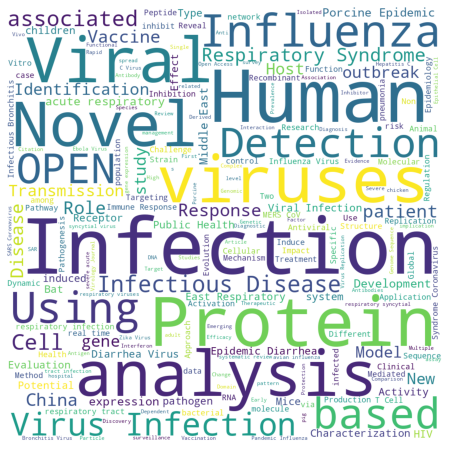

In [0]:
wordcloud_draw(str(all_title_df.select('all_titles').collect()[0]))